# Classification and Regression Trees

## Decision Tree for Classification

- Sequence of if-else question about individual features 
- Objective: infer class labels
- Able to capture non-linear relationships between features and labels
- Don't require feature scaling (ex: Standardization,..)


![image](image.png)


In [1]:
import pandas as pd
breast_cancer = pd.read_csv("datasets/wbc.csv")
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# predict benign or malignant 

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

X = breast_cancer.drop(['diagnosis','Unnamed: 32'],axis =1)
y = breast_cancer['diagnosis']

# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 1)

In [3]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

# Fit dt to the traininng set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9035087719298246

## Classification tree learning 

**Information Gain**
![image-2](image-2.png)

**Learning**
- Nodes are grown recursively
- At each node, split the data based on:
    - feature f and split-point sp to maximize IG(node)
- If IG(node)=0, declare the node a  leaf

![image-3](image-3.png)


In [4]:
# Instantiate dt, set information criterion parameter to 'gini'
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

# Fit dt to the traininng set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

## Decision tree for regression

In [5]:
auto_mpg = pd.read_csv('datasets/auto.csv')
auto_mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


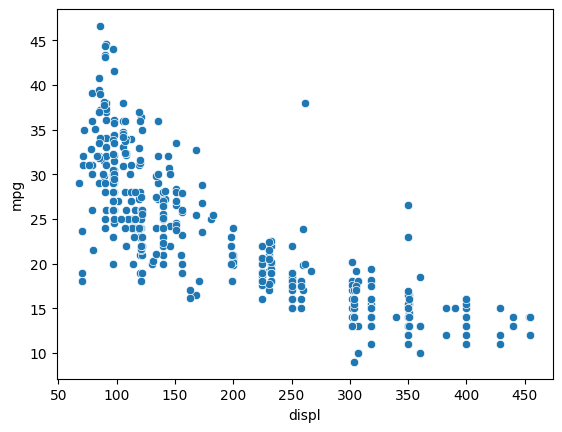

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.scatterplot(data=auto_mpg,x="displ",y='mpg')
plt.show()

The plot shows that the mpg-consumption decreases nonlinearly with displacement. Note that linear models such as linear regression would not be able to capture such a non-linear trend.

In [16]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

X = auto_mpg.drop(['mpg','hp','weight','accel','origin','size'],axis=1)
y = auto_mpg['mpg']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state= 3)

In [17]:
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.1, #stopping condition in which each leaf has to contain at least 10% of the training data
                          random_state=3)

In [18]:
# Fit 'dt' to the training-set 
dt.fit(X_train,y_train)
# Predict test_set labels
y_pred = dt.predict(X_test)

In [19]:
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print(rmse_dt)

5.102306888903137
